# Python Opportunistic Network Simulator

In [24]:
import random
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pons
import pons.routing as pr

## Set Experiment Parameters

In [25]:
SIM_TIME = 3600
NET_RANGE = 100
NUM_NODES = 10
WORLD_SIZE = (1000, 1000)
RUNS = 10
MSG_GEN_INTERVAL = (20, 40)
MSG_SIZE = (150, 512)

ROUTERS=[pr.EpidemicRouter(), pr.SprayAndWaitRouter(copies=7), pr.SprayAndWaitRouter(copies=7, binary=True), pr.DirectDeliveryRouter(), pr.FirstContactRouter()]

## Run Experiments

In [26]:

net_stats = []
routing_stats = []
for router in ROUTERS:
    print("router: %s" % router)
    for run in range(RUNS):
        random.seed(run)
        print("run", run+1)

        moves = pons.generate_randomwaypoint_movement(SIM_TIME, NUM_NODES, WORLD_SIZE[0], WORLD_SIZE[1], min_speed=1.0, max_speed=3.0, max_pause=120.0)
        net = pons.NetworkSettings("WIFI", range=NET_RANGE)

        nodes = pons.generate_nodes(NUM_NODES, net=[net], router=copy.deepcopy(router))
        config = {"movement_logger": False, "peers_logger": False}

        msggenconfig = {"interval": MSG_GEN_INTERVAL, "src": (0, NUM_NODES), "dst": (0, NUM_NODES), "size": MSG_SIZE, "id": "M"}

        netsim = pons.NetSim(SIM_TIME, WORLD_SIZE, nodes, moves, config=config, msggens=[msggenconfig])

        netsim.setup()
        
        netsim.run()

        ns = copy.deepcopy(netsim.net_stats)
        ns['router'] = "" + str(router)
        net_stats.append(ns)
        rs = copy.deepcopy(netsim.routing_stats)
        rs['router'] = "" + str(router)
        routing_stats.append(rs)

# convert list of dictionaries to dataframe
df_net=pd.DataFrame.from_dict(net_stats, orient='columns')
df_routing=pd.DataFrame.from_dict(routing_stats, orient='columns')

router: EpidemicRouter
run 1
initialize simulation
-> start movement manager
[<pons.node.Node object at 0x1724683d0>, <pons.node.Node object at 0x172468290>, <pons.node.Node object at 0x1724680d0>, <pons.node.Node object at 0x1724212d0>, <pons.node.Node object at 0x172421110>, <pons.node.Node object at 0x172420f10>, <pons.node.Node object at 0x172420d50>, <pons.node.Node object at 0x172420b90>, <pons.node.Node object at 0x1724209d0>, <pons.node.Node object at 0x172420850>]
run simulation
start message generator

simulation finished
simulated 3601 seconds in 0.30 seconds (12027.75 x real time)
real: 0.299391, sim: 3601 rate: 12027.75 steps/s
run 2
initialize simulation
-> start movement manager
[<pons.node.Node object at 0x137871b90>, <pons.node.Node object at 0x137871ad0>, <pons.node.Node object at 0x137871910>, <pons.node.Node object at 0x137871710>, <pons.node.Node object at 0x137871510>, <pons.node.Node object at 0x1378712d0>, <pons.node.Node object at 0x1378710d0>, <pons.node.Node 

In [27]:
df_net

,tx,rx,drop,loss,router
0,10242,10156,86,0,EpidemicRouter
1,7335,7276,59,0,EpidemicRouter
2,11759,11637,122,0,EpidemicRouter
3,8869,8781,88,0,EpidemicRouter
4,9580,9498,82,0,EpidemicRouter
5,8942,8856,86,0,EpidemicRouter
6,10487,10390,97,0,EpidemicRouter
7,11361,11243,118,0,EpidemicRouter
8,10924,10812,112,0,EpidemicRouter
9,6996,6928,68,0,EpidemicRouter


In [28]:
df_routing

,created,delivered,dropped,started,relayed,removed,aborted,dups,latency_avg,delivery_prob,hops_avg,overhead_ratio,router
0,122,104,0,2936,2936,0,0,2136,421.985103,0.852459,1.942308,27.230769,EpidemicRouter
1,122,83,0,2393,2392,0,0,1657,495.837959,0.680328,2.156627,27.819277,EpidemicRouter
2,120,94,0,3071,3071,0,0,2245,409.008518,0.783333,2.308511,31.670213,EpidemicRouter
3,115,95,0,2793,2793,0,0,2032,491.231060,0.826087,2.210526,28.400000,EpidemicRouter
4,121,96,0,3118,3118,0,0,2278,520.325528,0.793388,2.260417,31.479167,EpidemicRouter
5,122,93,0,2493,2492,0,0,1729,512.908610,0.762295,2.311828,25.795699,EpidemicRouter
6,118,83,0,2959,2958,0,0,2197,480.299405,0.703390,2.216867,34.638554,EpidemicRouter
7,118,102,0,3705,3705,0,0,2807,494.704910,0.864407,2.441176,35.323529,EpidemicRouter
8,124,102,0,3350,3350,0,0,2464,441.943636,0.822581,2.333333,31.843137,EpidemicRouter
9,119,95,0,2092,2090,0,0,1350,574.226849,0.798319,1.894737,21.000000,EpidemicRouter


## Analyze the Results

In [29]:
sns.set()

In [30]:
def plot_violin_boxplot(df, x, y, title, xlabel, ylabel, palette="turbo", ylim=None, ax=None):
    ax = sns.violinplot(x=x, y=y, data=df, saturation=0.5, inner=None, linewidth=0, palette=palette, ax=ax)
    ax = sns.boxplot(x=x, y=y, data=df, boxprops={'zorder': 2}, ax=ax, saturation=0.8, palette=palette)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.xticks(rotation=10)
    if ylim is not None:
        ax.set_ylim(ylim)
    ax.legend([],[], frameon=False)
    for patch in ax.patches:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, .3))
    return ax

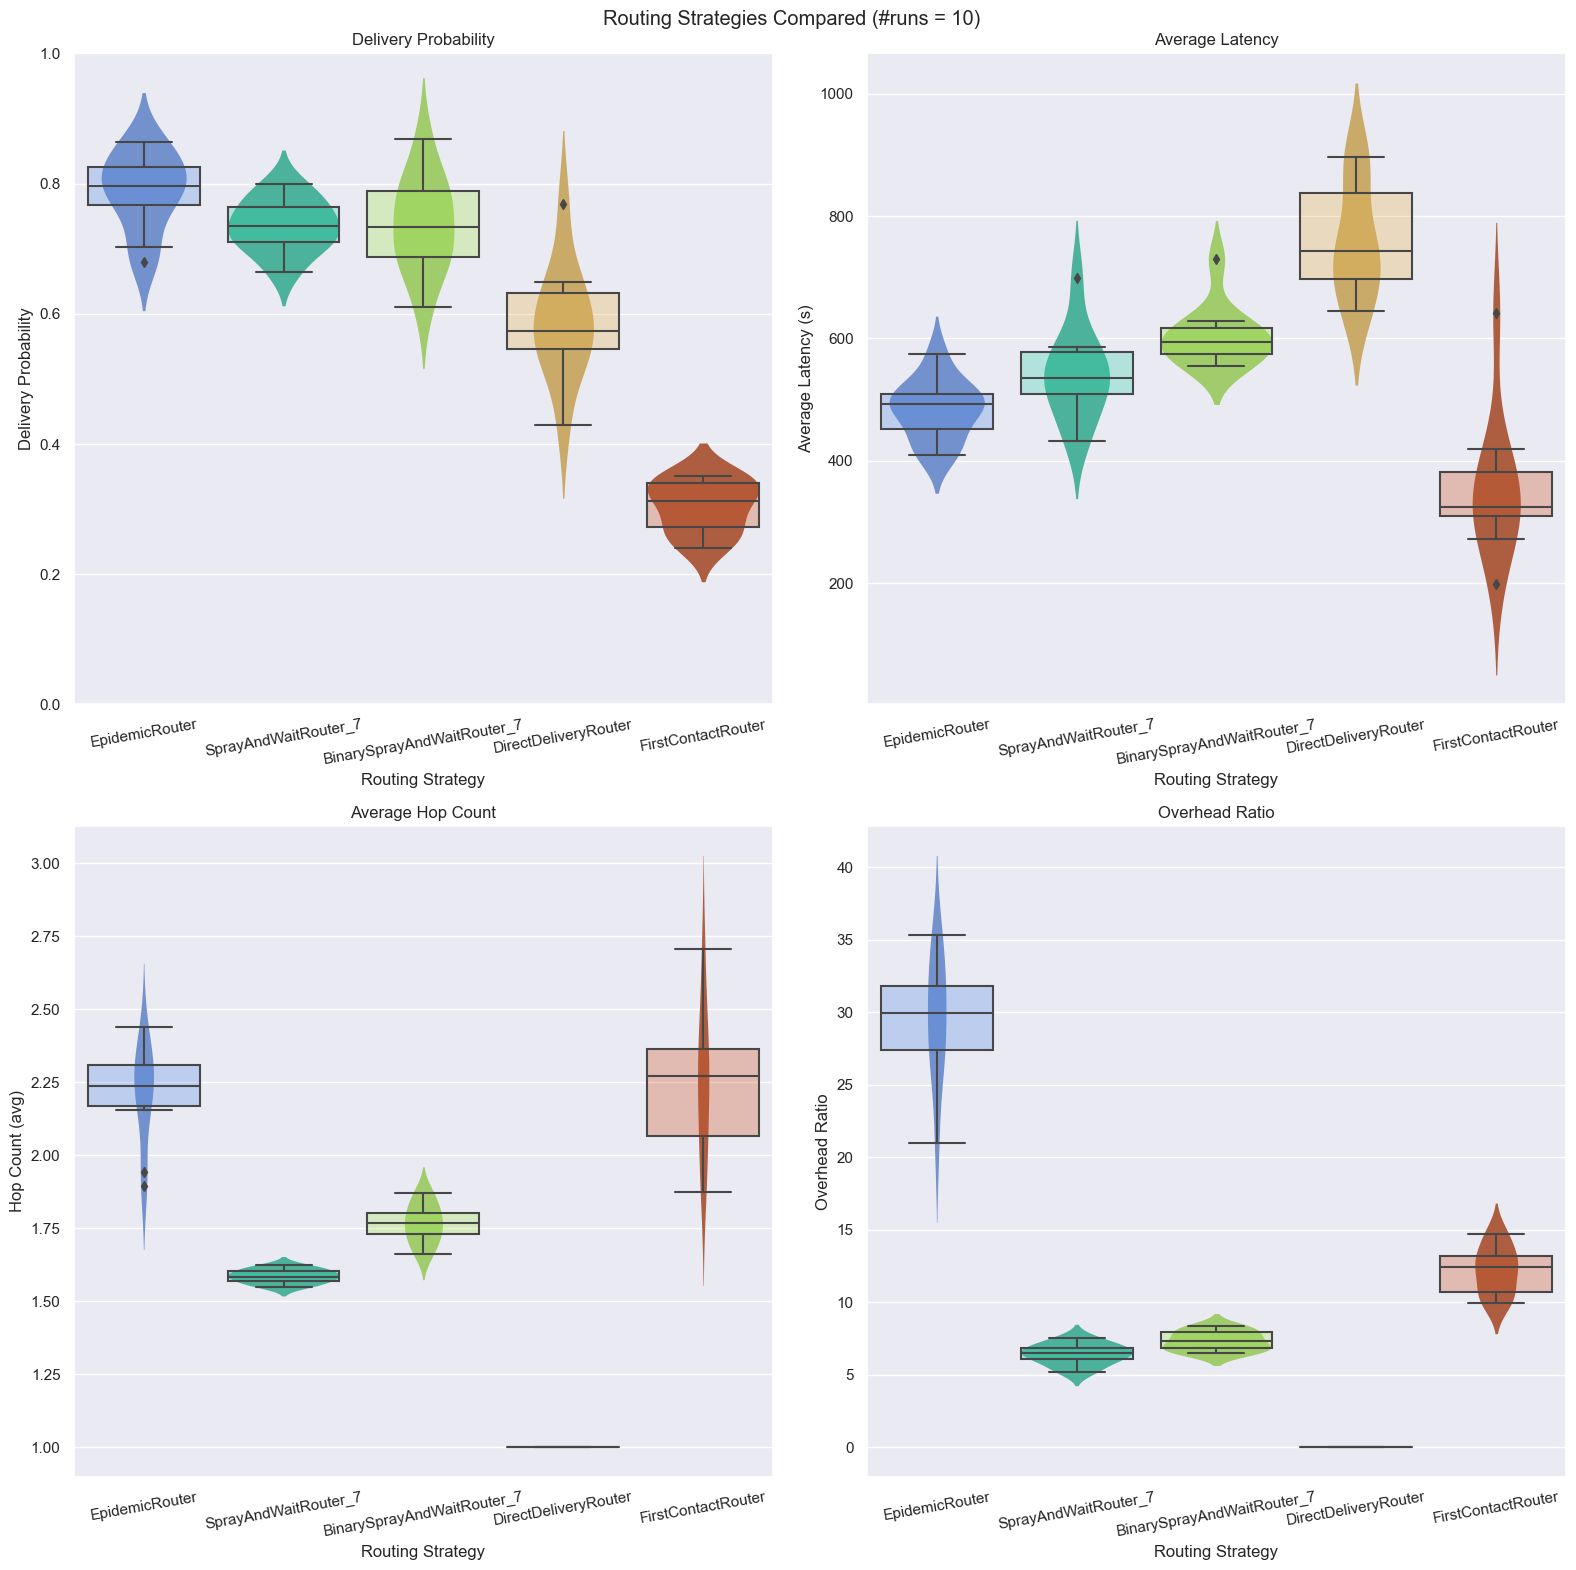

In [31]:
f = plt.figure(figsize=(16, 16))
f.suptitle("Routing Strategies Compared (#runs = %d)" % RUNS)
gs = f.add_gridspec(2, 2)
ax1 = f.add_subplot(gs[0, 0])
plot_violin_boxplot(df_routing, "router", "delivery_prob", "Delivery Probability", "Routing Strategy", "Delivery Probability", palette="turbo", ylim=(0,1), ax=ax1)
ax2 = f.add_subplot(gs[0, 1])
plot_violin_boxplot(df_routing, "router", "latency_avg", "Average Latency", "Routing Strategy", "Average Latency (s)", palette="turbo", ax=ax2)
ax3 = f.add_subplot(gs[1, 0])
plot_violin_boxplot(df_routing, "router", "hops_avg", "Average Hop Count", "Routing Strategy", "Hop Count (avg)", palette="turbo", ax=ax3)
ax4 = f.add_subplot(gs[1, 1])
plot_violin_boxplot(df_routing, "router", "overhead_ratio", "Overhead Ratio", "Routing Strategy", "Overhead Ratio", palette="turbo", ax=ax4)

f.tight_layout()
plt.show()

<Axes: xlabel='delivery_prob', ylabel='Proportion'>

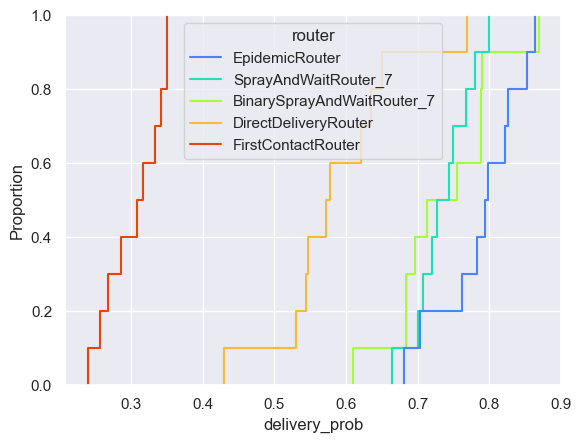

In [32]:
sns.ecdfplot(data=df_routing, x="delivery_prob", hue="router", palette="turbo")

<Axes: xlabel='delivery_prob', ylabel='overhead_ratio'>

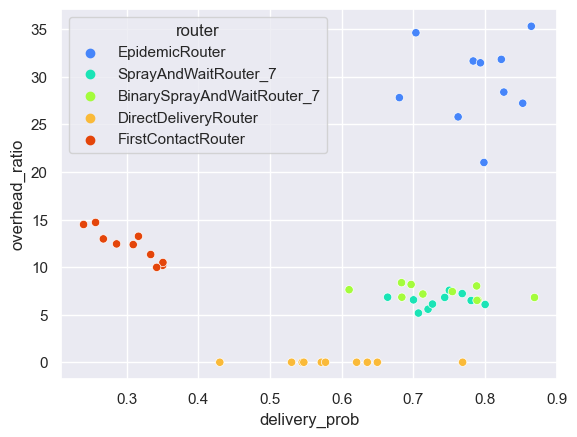

In [33]:
sns.scatterplot(data=df_routing, x="delivery_prob", y="overhead_ratio", hue="router", palette="turbo")

<Axes: xlabel='delivery_prob', ylabel='latency_avg'>

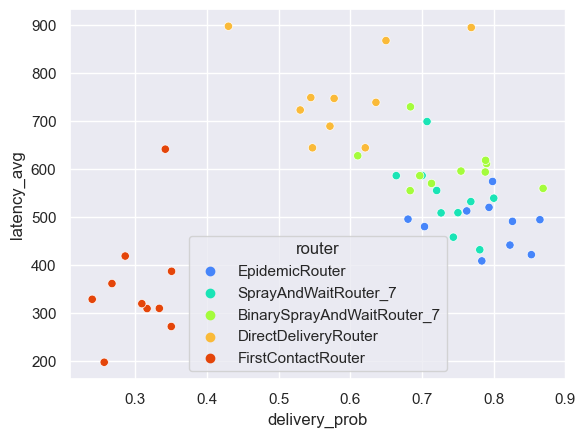

In [34]:
sns.scatterplot(data=df_routing, y="latency_avg", x="delivery_prob", hue="router", palette="turbo")

<Axes: xlabel='x', ylabel='y'>

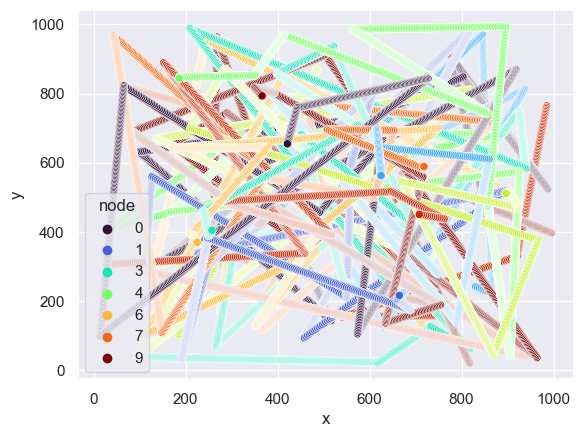

In [35]:
run=0
random.seed(run)
moves = pons.generate_randomwaypoint_movement(SIM_TIME, NUM_NODES, WORLD_SIZE[0], WORLD_SIZE[1], max_pause=60.0)

df = pd.DataFrame(moves, columns=["time", "node", "x", "y", "z"])

sns.scatterplot(data=df, x="x", y="y", hue="node", palette="turbo")

<Axes: xlabel='x', ylabel='y'>

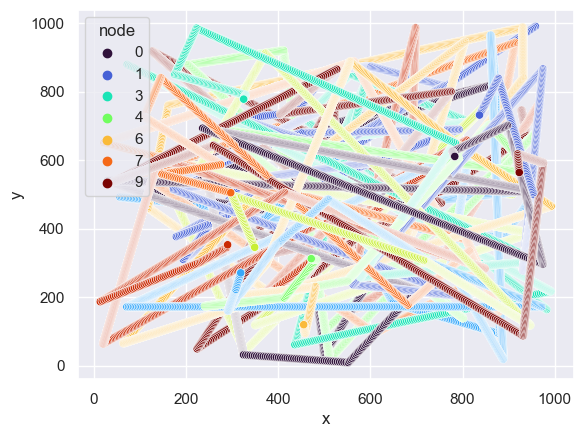

In [36]:
run=1
random.seed(run)
moves = pons.generate_randomwaypoint_movement(SIM_TIME, NUM_NODES, WORLD_SIZE[0], WORLD_SIZE[1], max_pause=60.0)

df = pd.DataFrame(moves, columns=["time", "node", "x", "y", "z"])

sns.scatterplot(data=df, x="x", y="y", hue="node", palette="turbo")

<Axes: xlabel='x', ylabel='y'>

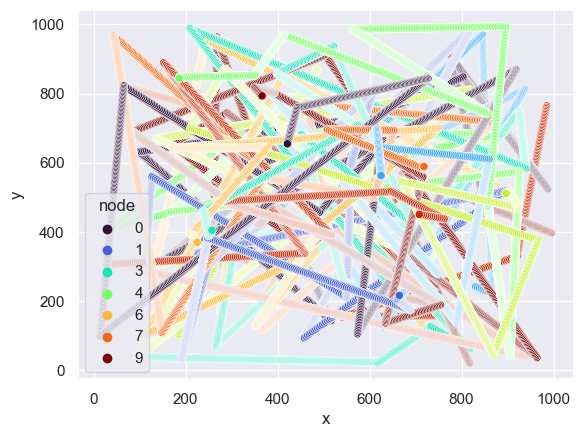

In [37]:
run=0
random.seed(run)
moves = pons.generate_randomwaypoint_movement(SIM_TIME, NUM_NODES, WORLD_SIZE[0], WORLD_SIZE[1], max_pause=60.0)

df = pd.DataFrame(moves, columns=["time", "node", "x", "y", "z"])

sns.scatterplot(data=df, x="x", y="y", hue="node", palette="turbo")

<Axes: xlabel='x', ylabel='y'>

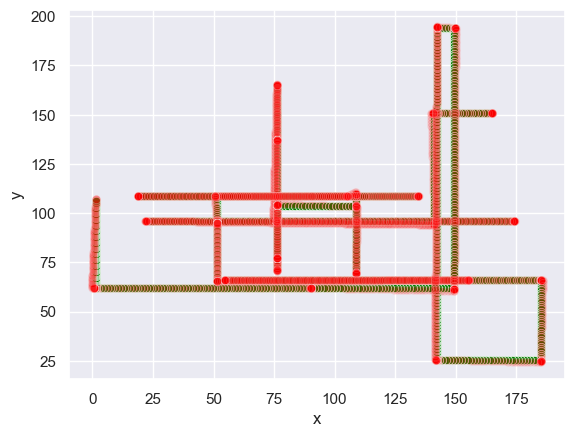

In [38]:
one = pons.OneMovement.from_file("examples/data/scenario1.one")
df = pd.DataFrame(one.moves, columns=["time", "node", "x", "y", "z"])
sns.scatterplot(data=df, x="x", y="y", color="green")
ns2 = pons.Ns2Movement.from_file("examples/data/scenario1.ns_movements")
df = pd.DataFrame(ns2.moves, columns=["time", "node", "x", "y", "z"])
sns.scatterplot(data=df, x="x", y="y",color="red", alpha=0.15)